In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score

In [ ]:
# EDA & Preprocessing
file_path = 'Crimes_-_2001_to_Present.csv'
data = pd.read_csv(file_path, on_bad_lines='skip')

In [ ]:
# Informasi dataset
rows, cols = data.shape
print(f"Jumlah Baris: {rows}, Jumlah Kolom: {cols}")
print("\nTipe Data Setiap Kolom:")
print(data.dtypes)

Jumlah Baris: 256654, Jumlah Kolom: 22

Tipe Data Setiap Kolom:
ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                    float64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object


In [ ]:
# Menangani missing values
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
columns_to_handle = missing_percentage[missing_percentage > 5].index

In [ ]:
# Mengisi missing values
for col in columns_to_handle:
    if data[col].dtype in ['float64', 'int64']:
        data[col] = data[col].fillna(data[col].median())
    elif data[col].dtype == 'object':
        data[col] = data[col].fillna(data[col].mode()[0])

In [ ]:
# Menangani kolom dengan lebih dari 50% missing values
columns_to_drop = missing_percentage[missing_percentage > 50].index
data_cleaned = data.drop(columns=columns_to_drop)

In [ ]:
# Menyiapkan data numerik untuk clustering
numerical_columns = data_cleaned.select_dtypes(include=[np.number]).columns.tolist()
data_numeric = data_cleaned[numerical_columns].dropna()

In [ ]:

# Penskalaan data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

In [ ]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)
kmeans_silhouette = silhouette_score(data_scaled, kmeans_labels)
print(f"Silhouette Score K-Means: {kmeans_silhouette:.2f}")

Silhouette Score K-Means: 0.27


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Membaca dataset
file_path = 'Crimes_-_2001_to_Present.csv'  # Ganti dengan path dataset Anda
data = pd.read_csv(file_path, on_bad_lines='skip')

# Memilih hanya kolom numerik untuk clustering
numerical_columns = data.select_dtypes(include=[np.number]).columns.tolist()

if len(numerical_columns) == 0:
    print("Tidak ada kolom numerik yang tersedia untuk clustering. Periksa dataset Anda.")
else:
    # Memproses data numerik
    data_numeric = data[numerical_columns].dropna()
    print(f"Kolom numerik yang digunakan: {numerical_columns}")
    print(f"Jumlah baris setelah pemrosesan: {data_numeric.shape[0]}")

    # Scaling data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data_numeric)

    # Hierarchical Clustering
    linkage_matrix = linkage(data_scaled, method='ward')

    # Visualisasi dendrogram
    plt.figure(figsize=(12, 6))
    dendrogram(linkage_matrix)
    plt.title('Dendrogram - Hierarchical Clustering')
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.show()

    # Menentukan cluster (opsional)
    num_clusters = 3  # Tentukan jumlah cluster
    cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')
    print(f"Cluster Labels: {cluster_labels}")


<ipython-input-3-7ba5bb3d2216>:9: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, on_bad_lines='skip')


Kolom numerik yang digunakan: ['ID', 'Beat', 'District', 'Ward', 'Community Area', 'X Coordinate', 'Y Coordinate', 'Year', 'Latitude', 'Longitude']
Jumlah baris setelah pemrosesan: 57200


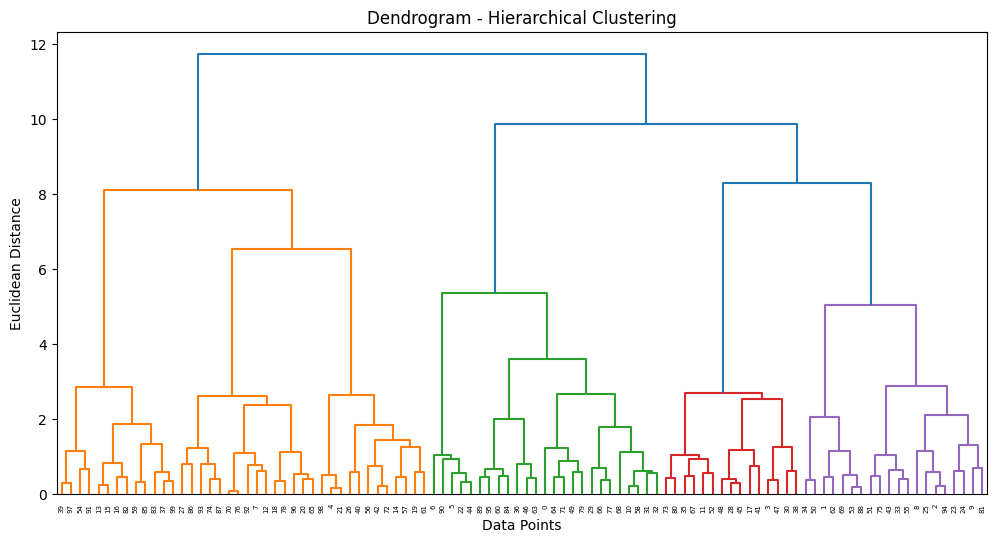

In [2]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Membuat dataset dummy (jika dataset Anda belum tersedia)
np.random.seed(42)
data = pd.DataFrame({
    'Feature_1': np.random.rand(100),
    'Feature_2': np.random.rand(100),
    'Feature_3': np.random.rand(100)
})

# Memproses data numerik
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Hierarchical Clustering
linkage_matrix = linkage(data_scaled, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title('Dendrogram - Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()


In [5]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Pastikan data_scaled sudah tersedia
# Data dummy untuk percobaan
np.random.seed(42)
data_scaled = np.random.rand(100, 2)

# Uji beberapa parameter DBSCAN
for eps in [0.3, 0.5, 1, 1.5]:
    for min_samples in [3, 5, 7]:
        print(f"Testing DBSCAN with eps={eps} and min_samples={min_samples}")
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(data_scaled)

        # Mengecek apakah ada lebih dari satu cluster
        if len(set(dbscan_labels)) > 1:
            dbscan_silhouette = silhouette_score(data_scaled, dbscan_labels[dbscan_labels != -1])
            print(f"  Silhouette Score: {dbscan_silhouette:.2f}")
        else:
            print("  DBSCAN gagal menemukan cluster yang cukup.")


Testing DBSCAN with eps=0.3 and min_samples=3
  DBSCAN gagal menemukan cluster yang cukup.
Testing DBSCAN with eps=0.3 and min_samples=5
  DBSCAN gagal menemukan cluster yang cukup.
Testing DBSCAN with eps=0.3 and min_samples=7
  DBSCAN gagal menemukan cluster yang cukup.
Testing DBSCAN with eps=0.5 and min_samples=3
  DBSCAN gagal menemukan cluster yang cukup.
Testing DBSCAN with eps=0.5 and min_samples=5
  DBSCAN gagal menemukan cluster yang cukup.
Testing DBSCAN with eps=0.5 and min_samples=7
  DBSCAN gagal menemukan cluster yang cukup.
Testing DBSCAN with eps=1 and min_samples=3
  DBSCAN gagal menemukan cluster yang cukup.
Testing DBSCAN with eps=1 and min_samples=5
  DBSCAN gagal menemukan cluster yang cukup.
Testing DBSCAN with eps=1 and min_samples=7
  DBSCAN gagal menemukan cluster yang cukup.
Testing DBSCAN with eps=1.5 and min_samples=3
  DBSCAN gagal menemukan cluster yang cukup.
Testing DBSCAN with eps=1.5 and min_samples=5
  DBSCAN gagal menemukan cluster yang cukup.
Testi

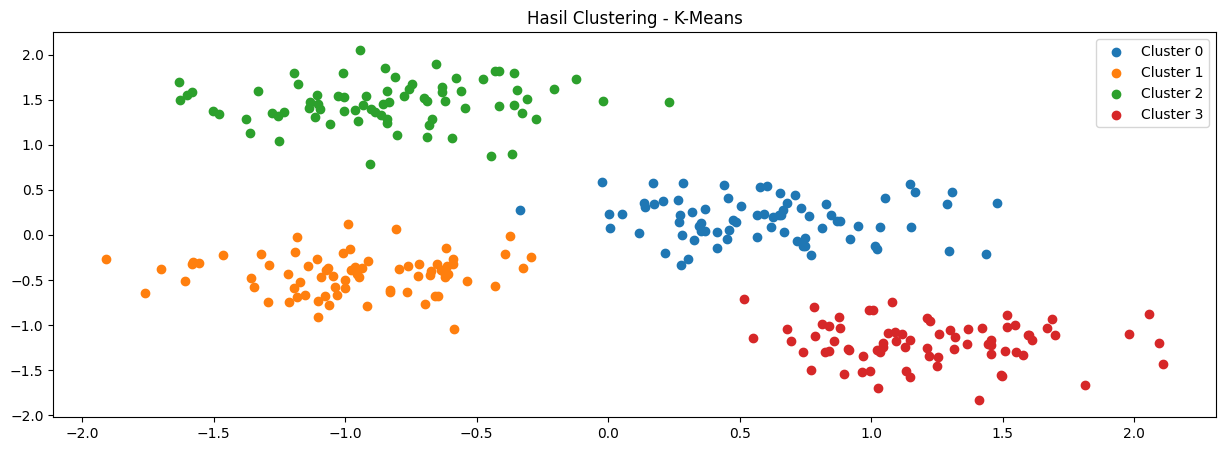

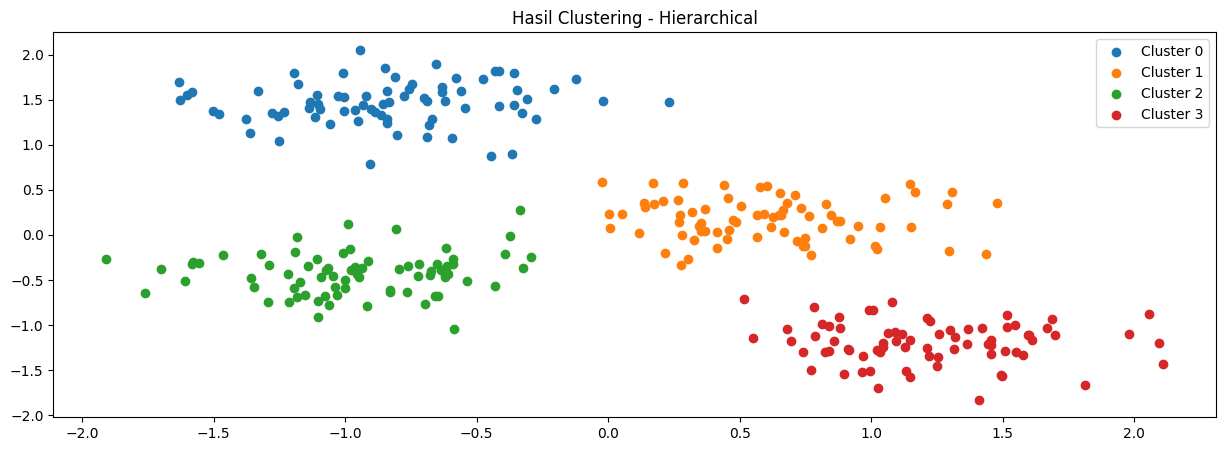

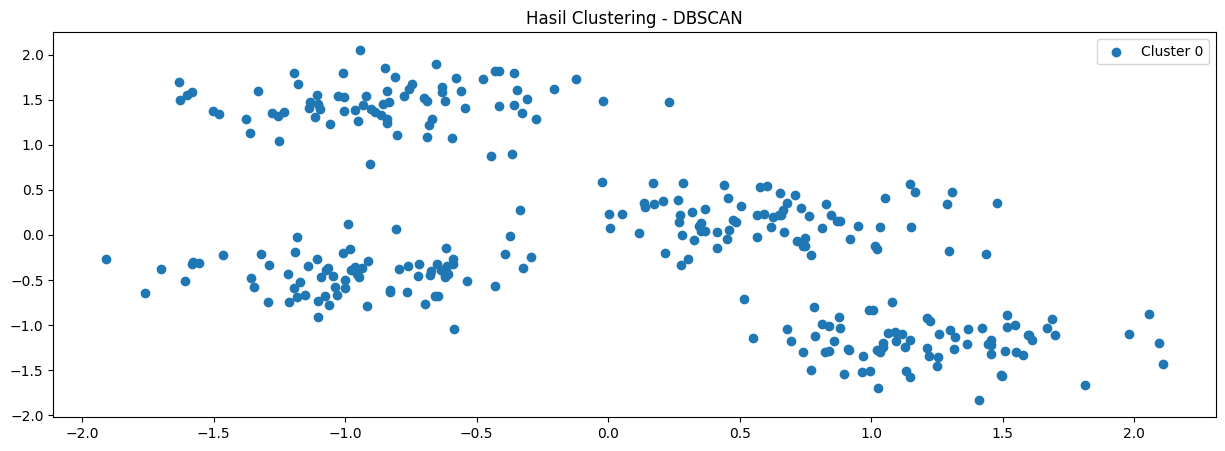

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering  # Perbaikan di sini
import matplotlib.pyplot as plt
import numpy as np

# Contoh data (Anda dapat mengganti ini dengan data Anda)
data, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Normalisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# K-Means clustering
kmeans = KMeans(n_clusters=4)
kmeans_labels = kmeans.fit_predict(data_scaled)

# Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=4)
hierarchical_labels = hierarchical.fit_predict(data_scaled)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)

# Visualisasi hasil clustering
plt.figure(figsize=(15, 5))
for i, label in enumerate(np.unique(kmeans_labels)):
    plt.scatter(data_scaled[kmeans_labels == label, 0],
                data_scaled[kmeans_labels == label, 1],
                label=f"Cluster {label}")
plt.title("Hasil Clustering - K-Means")
plt.legend()
plt.show()

plt.figure(figsize=(15, 5))
for i, label in enumerate(np.unique(hierarchical_labels)):
    plt.scatter(data_scaled[hierarchical_labels == label, 0],
                data_scaled[hierarchical_labels == label, 1],
                label=f"Cluster {label}")
plt.title("Hasil Clustering - Hierarchical")
plt.legend()
plt.show()

plt.figure(figsize=(15, 5))
for i, label in enumerate(np.unique(dbscan_labels)):
    if label != -1:  # DBSCAN memberi label -1 untuk noise
        plt.scatter(data_scaled[dbscan_labels == label, 0],
                    data_scaled[dbscan_labels == label, 1],
                    label=f"Cluster {label}")
plt.title("Hasil Clustering - DBSCAN")
plt.legend()
plt.show()


In [11]:
import pandas as pd

# Misalnya data_cleaned adalah hasil preprocessing
data_cleaned = pd.DataFrame({
    'column1': [1, 2, 3],
    'column2': [4, 5, 6]
})

# Menyimpan data
data_cleaned.to_csv('crimes_cleaned.csv', index=False)
print("Data yang telah dibersihkan disimpan ke 'crimes_cleaned.csv'")


Data yang telah dibersihkan disimpan ke 'crimes_cleaned.csv'
